In [1]:
%matplotlib notebook
from matplotlib import cycler
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

# Text and Annotation
## Example: Effect of Holidays on US Births

In [ ]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', 
                                   [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

## Transforms and Text Position
* ax.transData
    * Transform associated with data coordinates
    
    
* ax.transAxes
    * Transform associated with the axes (in units of axes dimensions)
    
    
* fig.transFigure
    * Transform associated with the figure (in units of figure dimensions)


In [ ]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

In [ ]:
# if we change the axes limits, 
# it is only the transData coordinates that will be affected, 
# while the others remain stationary
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation
1. plt.annotate: creates some text and an arrow, and the arrows can be very flexibly specified. 

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.1))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', 
            xytext=(-80, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle="fancy", 
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

# Customizing Ticks
Each axes has attributes xaxis and yaxis, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make up the axes.

## Major and Minor Ticks


In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
ax = plt.axes(xscale='log', yscale='log')
ax.set_xlim(1e-7, 1e-1)
ax.set_ylim(1e-7, 1e-1)

In [ ]:
ax.xaxis.get_major_locator()

In [ ]:
ax.xaxis.get_minor_locator()

In [ ]:
ax.xaxis.get_major_formatter()

In [ ]:
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels


In [ ]:
ax = plt.axes()
ax.plot(np.random.rand(50))

# remove the labels (but keep the ticks/gridlines) from the x axis
ax.xaxis.set_major_formatter(plt.NullFormatter())

# remove the ticks (and thus the labels as well) from the y axis.
ax.yaxis.set_major_locator(plt.NullLocator())


In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikitd-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

## Reducing or Increasing the Number of Ticks

plt.MaxNLocator(), which allows us to specify the maximum number of ticks that will be displayed. 

Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

In [ ]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(2))
    
fig

## Fancy Tick Formats

<img src='files/locator_formatter.PNG'>

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

In [ ]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

In [ ]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return "$\pi/2$"
    elif N == 2:
        return "$\pi$"
    elif N % 2 > 0:
        return "${0}\pi/2$".format(N)
    else:
        return "${0}\pi$".format(N // 2)
    
# Matplotlib’s LaTeX support, 
# specified by enclosing the string within dollar signs.

In [ ]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

# Customizing Matplotlib: Configurations and Stylesheets
## Plot Customization by Hand

In [ ]:
plt.style.use('classic')

In [ ]:
x = np.random.randn(1000)
ax = plt.axes()
ax.hist(x);

In [ ]:
# use a gray background
ax = plt.axes(fc='#E6E6E6')
ax.set_axisbelow(True)

# draw a solid white grid lines
plt.grid(c='w', ls='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor="#E6E6E6", color='#EE6666');

## Changing the Defaults: rcParams
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. 

You can adjust this configuration at any time using the plt.rc convenience routine.

In [ ]:
plt.rc?

In [ ]:
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [ ]:
plt.hist(x);

In [ ]:
# example of simple line plots with these rc params
for i in range(4):
    plt.plot(np.random.rand(10))

## Stylesheet
`plt.style.use('stylename')` will change the style for the rest of the session!

Sets a style temporarily

`with plt.style.context('stylename'):
    make_a_plot()`

In [ ]:
plt.style.available

In [ ]:
%run style_sheets_reference.py

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

In [ ]:
# reset rcParams
plt.rcParams.update(plt.rcParamsDefault);

# Three-Dimensional Plotting in Matplotlib

1. from **mpl_toolkits** import mplot3d
2. Once this submodule is imported, we can create a 3d axes by passing the keyword projection='3d' to any of the normal axes creation routines.
3. 3D plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook
4. Recall that to use interactive fitures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

## Three-Dimensional Points and Lines

1. Most basic 3d plot: a line or a scatter plot created from sets of (x, y, z) triples.
2. Use ax.plot3D and ax.scatter3D functions.

<IPython.core.display.Javascript object>


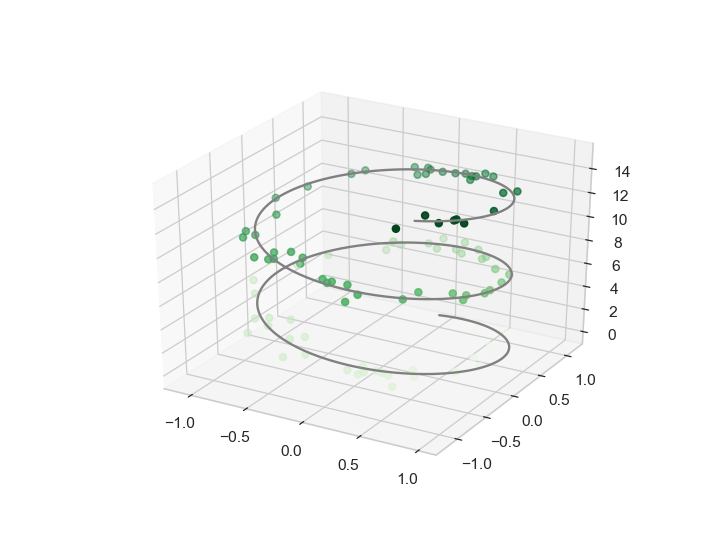

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-Dimensional Contour Plots

In [12]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [13]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


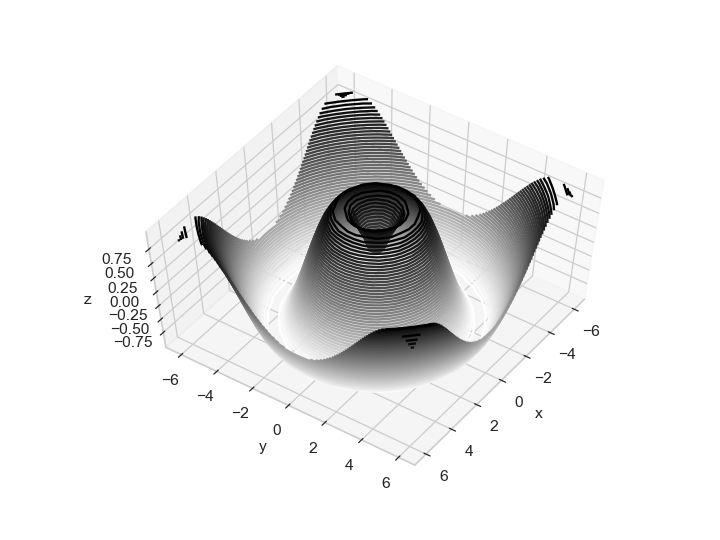

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(60, 35)

## Wireframes and Surface Plots

<IPython.core.display.Javascript object>


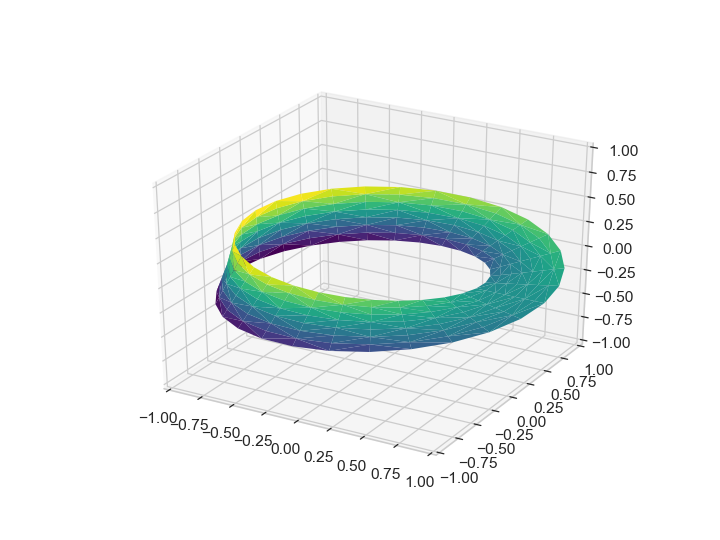

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

In [20]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [21]:
# Note that though the grid of values for a surface plot 
# needs to be two-dimensional, it need not be rectilinear.

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

In [22]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

In [23]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

In [25]:
# creates a surface by first finding a set of triangles 
# formed between adjacent points
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

In [27]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [28]:
phi = 0.5 * theta

In [29]:
# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

In [30]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);